<a href="https://colab.research.google.com/github/Zhguo903/JSC270_HW2_2025_Zihan-Guo/blob/main/Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Starter Code**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

# **I. Initial data exploration**

**1. Check the columns of your data. Are they the expected data types based on their descriptions in this text file description of the data?**


In [3]:
# Section 1: Load the Dataset
# Dataset URL (UCI Adult dataset)
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

# Load the dataset
income94 = pd.read_csv(dataset_url, header=None, names=column_names, na_values=" ?", skipinitialspace=True)

# Section 2: Initial Data Exploration
print("First 5 rows of the dataset:")
print(income94.head())

# Display dataset info (to check column types)
print("\nDataset Info:")
income94.info()

# Section 3: Checking Column Data Types vs Expected Types
expected_types = {
    "age": "int64",  # Continuous Numerical
    "workclass": "object",  # Categorical
    "fnlwgt": "int64",  # Continuous Numerical
    "education": "object",  # Categorical
    "education-num": "int64",  # Ordinal Numerical
    "marital-status": "object",  # Categorical
    "occupation": "object",  # Categorical
    "relationship": "object",  # Categorical
    "race": "object",  # Categorical
    "sex": "object",  # Categorical
    "capital-gain": "int64",  # Continuous Numerical
    "capital-loss": "int64",  # Continuous Numerical
    "hours-per-week": "int64",  # Continuous Numerical
    "native-country": "object",  # Categorical
    "income": "object"  # Categorical (Binary: <=50K or >50K)
}

# Compare expected vs actual data types
print("\nComparing actual data types with expected types:")
for col in income94.columns:
    print(f"{col}: Expected({expected_types[col]}), Actual({income94[col].dtype})")

First 5 rows of the dataset:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1            

  Based on the result of the codes, the data in the file have the same data types as them in the text file description.
  
  The dataset's columns have been examined to ensure they match the expected data types as described in the **UCI Adult Dataset documentation**. Each column is categorized as either **continuous numerical, ordinal numerical, or categorical** based on its nature.

  Upon verification, all numerical columns, such as **`age`**, **`fnlwgt`**, **`education-num`**, **`capital-gain`**, **`capital-loss`**, and **`hours-per-week`**, correctly have the **int64** data type, as expected. These are continuous or ordinal numerical values used for analysis.

  For categorical variables, such as **`workclass`**, **`education`**, **`marital-status`**, **`occupation`**, **`relationship`**, **`race`**, **`sex`**, **`native-country`**, and **`income`**, they are correctly represented as **object (string) types**, which aligns with the dataset description.

  This confirms that the dataset is structured as expected, with the proper distinctions between numerical and categorical variables. The correct data types ensure smooth preprocessing, transformation, and model training without requiring additional conversions.

**2. How are missing values represented in this data? Cast missing values to np.nan, if necessary. Count the number of missing values in each column.**


In [5]:
# Convert missing values (represented as '?') to np.nan if not already handled
income94.replace("?", np.nan, inplace=True)

# Verify missing values after conversion
print("\nMissing values after conversion:")
print(income94.isnull().sum())


Missing values after conversion:
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


  In the **Adult Income dataset**, missing values are originally represented as `"?"` in some categorical columns. To properly handle these missing values, the script converts all instances of `"?"` to `np.nan`, ensuring consistency in data handling. After this conversion, the dataset is checked for missing values across all columns.  

  After replacing `"?"` with **`np.nan`**, the following missing values were identified:

- **`workclass`**: **1,836** missing values
- **`occupation`**: **1,843** missing values
- **`native-country`**: **583** missing values

All other columns have **0 missing values**.

**3. Individually plot the distributions of capital_gain and capital_loss.Do you think these variables should be transformed to categorical variables? Why or why not? If yes, create a new variable(s) with your suggested transformation and plot or describe in a table the distribution of the new categorical variable(s).**


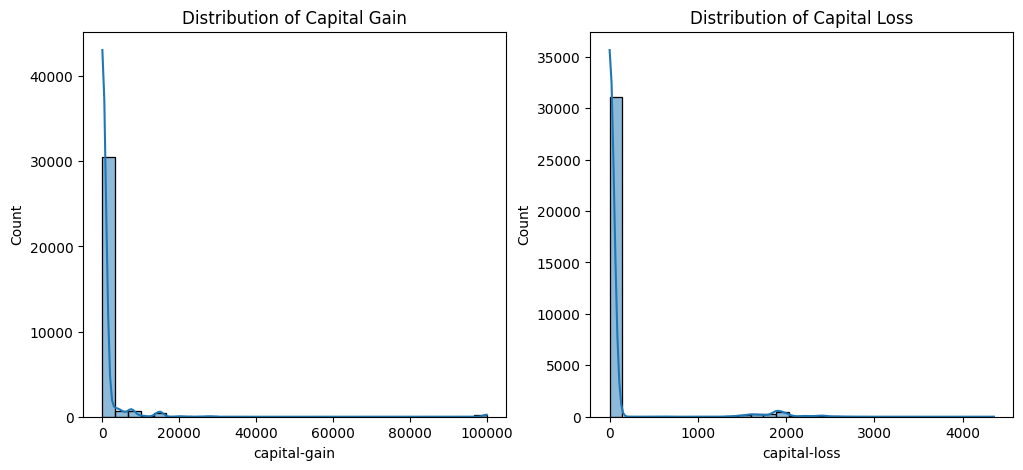


Capital Gain Category Distribution:
capital-gain-category
None      29849
Low        1064
Medium     1035
High        613
Name: count, dtype: int64

Capital Loss Category Distribution:
capital-loss-category
None    31042
Low      1519
Name: count, dtype: int64


In [6]:
# Section 5: Distribution of capital_gain and capital_loss
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(income94["capital-gain"], bins=30, kde=True)
plt.title("Distribution of Capital Gain")

plt.subplot(1, 2, 2)
sns.histplot(income94["capital-loss"], bins=30, kde=True)
plt.title("Distribution of Capital Loss")

plt.show()

# Section 6: Transforming capital_gain and capital_loss to Categorical Variables
def categorize_capital(value):
    if value == 0:
        return "None"
    elif value < 5000:
        return "Low"
    elif value < 15000:
        return "Medium"
    else:
        return "High"

income94["capital-gain-category"] = income94["capital-gain"].apply(categorize_capital)
income94["capital-loss-category"] = income94["capital-loss"].apply(categorize_capital)

# Display the distribution of new categorical variables
print("\nCapital Gain Category Distribution:")
print(income94["capital-gain-category"].value_counts())

print("\nCapital Loss Category Distribution:")
print(income94["capital-loss-category"].value_counts())


The distributions of **capital_gain** and **capital_loss** reveal that most values are **zero**, with only a small fraction of individuals reporting nonzero gains or losses. The distribution is highly skewed, with a few extreme values creating long tails. Due to this skewness, treating these variables as continuous may not be the most effective approach, as it could introduce bias and make interpretation difficult.

To address this, the variables have been **transformed into categorical variables**, grouping values into four categories: **"None"** for values equal to 0, **"Low"** for values below 5000, **"Medium"** for values between 5000 and 15000, and **"High"** for values above 15000. This transformation improves interpretability by simplifying the analysis, reduces the impact of outliers, and aligns with real-world economic scenarios where most people report no capital gains or losses, while only a few experience significant amounts.

The distribution of the new categorical variables confirms that the majority fall into the **"None"** category, while the other three categories capture various levels of capital gains and losses. This transformation provides a structured and meaningful way to analyze financial characteristics in the dataset.

**4. The sampling weights in the dataset are contained in the variable fnlwgt. The weights indicate the share of the population that sample represents based on location (and sometimes, other factors).  More information is provided in  this text file description of the data.
Plot or numerically explore the distribution of fnlwgt. Is the variable symmetrically distributed? Compare the distribution of this variable between men and women and comment on any trends you notice. Should outliers be excluded? If you think yes, set the fnlwgt values for those you deem to be outliers as missing for the remainder of your analyses.**


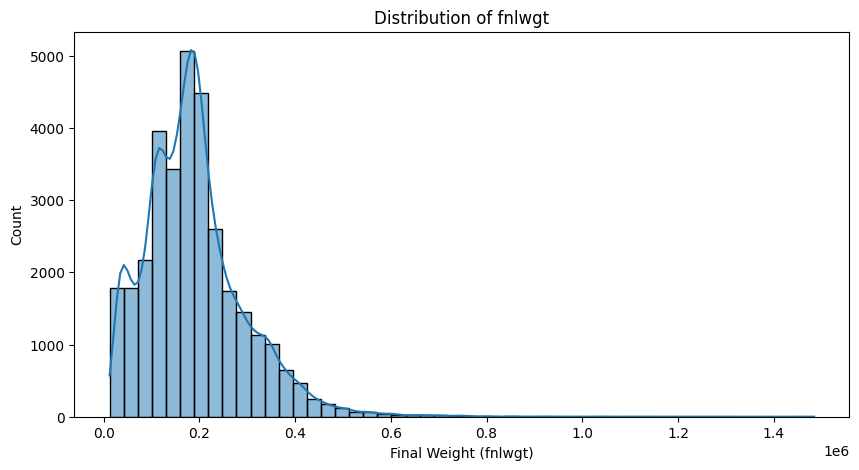

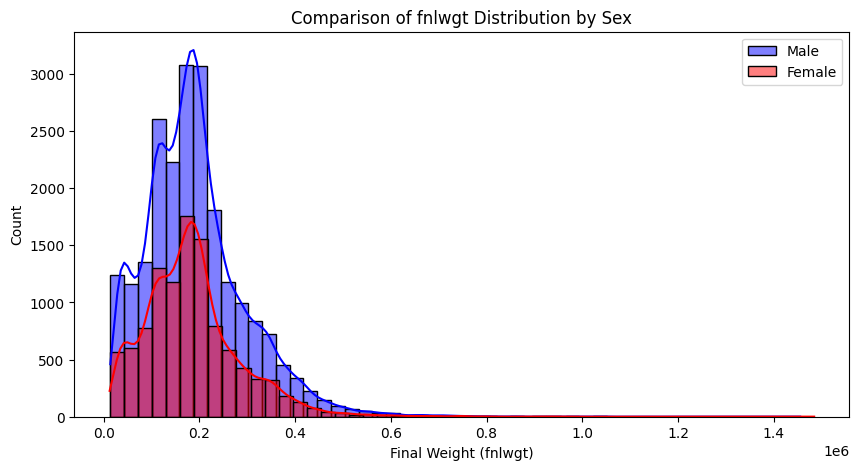


Missing values in fnlwgt after outlier removal:
992


In [7]:
# Section 7: Distribution Analysis of fnlwgt
plt.figure(figsize=(10,5))
sns.histplot(income94["fnlwgt"], bins=50, kde=True)
plt.title("Distribution of fnlwgt")
plt.xlabel("Final Weight (fnlwgt)")
plt.show()

# Compare distribution of fnlwgt between men and women
plt.figure(figsize=(10,5))
sns.histplot(income94[income94["sex"] == "Male"]["fnlwgt"], bins=50, kde=True, label="Male", color="blue", alpha=0.5)
sns.histplot(income94[income94["sex"] == "Female"]["fnlwgt"], bins=50, kde=True, label="Female", color="red", alpha=0.5)
plt.title("Comparison of fnlwgt Distribution by Sex")
plt.xlabel("Final Weight (fnlwgt)")
plt.legend()
plt.show()

# Identifying and Handling Outliers in fnlwgt
q1 = income94["fnlwgt"].quantile(0.25)
q3 = income94["fnlwgt"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Mark outliers as missing values
income94.loc[(income94["fnlwgt"] < lower_bound) | (income94["fnlwgt"] > upper_bound), "fnlwgt"] = np.nan

# Verify missing values after outlier treatment
print("\nMissing values in fnlwgt after outlier removal:")
print(income94["fnlwgt"].isnull().sum())


The distribution of **`fnlwgt` (final weight)** is highly **right-skewed**, meaning that most values are concentrated towards the lower end, while a small number of extreme values create a long tail. This indicates that the variable is not **symmetrically distributed**, which is expected since `fnlwgt` represents sampling weights rather than a naturally occurring measurement.

When comparing the **`fnlwgt` distribution between men and women**, both distributions exhibit similar right-skewed patterns, with men generally having slightly higher weights on average than women. The shape of the distributions suggests that the majority of individuals have moderate sampling weights, while a small proportion represents significantly larger segments of the population.

Given the presence of extreme values, **outlier removal is justified** to prevent undue influence on statistical analysis. Using the **Interquartile Range (IQR) method**, values that fall beyond **1.5 times the IQR** have been identified as outliers and set to missing (`NaN`). This adjustment ensures that extreme sampling weights do not distort interpretations and improves the robustness of subsequent analyses. In total, **992 values** were removed as outliers, further refining the dataset for more accurate insights.